# A Workflow on the Titanic Data Set for Kaggle Competition

In this project, I will work with two data files from [Kaggle]("https://www.kaggle.com/c/titanic/data"), which is a competition. I have "train" and "test" data sets. The train data set is used to train my model to predict the people who survived. The test data set is used to test my model on it. The train data set has the column with information about survival data. However, the test data set doesn't have any columns about survival information. The [Kaggle]("https://www.kaggle.com/c/titanic/data") web page has more information about the columns. 
<br>
<br>
I will train my model and attach my prediction on Kaggle's website to see my model's performance.
<br> 
In the first step, I am going to start with exploring the data files. 

## Exploring the Data

In [1]:
import pandas as pd  # I will open the sets with Pandas.

train=pd.read_csv("train.csv")
holdout= pd.read_csv("test.csv")
test_shape = holdout.shape
test_shape

(418, 11)

In [2]:
train_shape= train.shape
train_shape

(891, 12)

The test data set has 418 entries and 11 columns. The train data set has 891 entries and 12 columns. The "Survived" column shows if the passenger survived or not. ( 0: " Not Survived ", 1: " Survived " )

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


I will check the status of survival against a passenger's gender and class. I will visualize it with Matplotlib library.

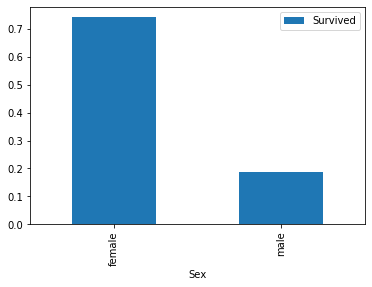

In [7]:
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()


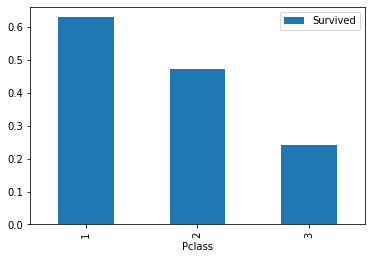

In [8]:
class_pivot= train. pivot_table(index= "Pclass", values= "Survived")
class_pivot.plot.bar()
plt.show()

I saw the status of survival according to gender and class factors. These two factors are categorical. I will also check the situation according to age factors. 

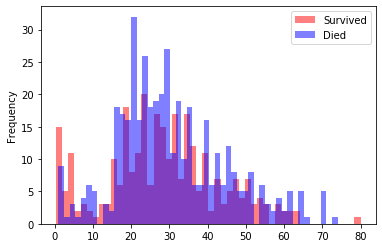

In [9]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [10]:

lst1=[] 
lst2=[] 
lst3=[]
df=train.copy()
n=len(df)
i=0 
while i< n:     
    if df['Pclass'][i]==1 and pd.isnull(df['Age'][i]) == False:         
        lst1.append(df['Age'][i])     
    elif df['Pclass'][i]==2  and pd.isnull(df['Age'][i]) == False:         
        lst2.append(df['Age'][i])     
    elif df['Pclass'][i]==3 and pd.isnull(df['Age'][i]) == False :         
        lst3.append(df['Age'][i])     
    i+=1  

Mean_Pclass_1 = sum(lst1)/len(lst1) 
Mean_Pclass_2 = sum(lst2)/len(lst2) 
Mean_Pclass_3 = sum(lst3)/len(lst3)  


                
    
    
def impute (col):  
    Age= col[0]     
    Pclass = col[1]     
    if pd.isnull(Age):         
        if Pclass ==1:             
            return Mean_Pclass_1         
        elif Pclass ==2:             
            return Mean_Pclass_2         
        else:             
            return Mean_Pclass_3     
    else:         
        return Age
    
    


In [11]:
df.Age= df[['Age', 'Pclass']].apply(impute, axis=1)


In [12]:
train=df.copy()

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Pclass_1     891 non-null    uint8  
 13  Pclass_2     891 non-null    uint8  
 14  Pclass_3     891 non-null    uint8  
 15  Sex_female   891 non-null    uint8  
 16  Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(5), object(5), uint8(5)
memory usage: 88.0+ KB


In [28]:
lst1=[] 
lst2=[] 
lst3=[]
n=len(holdout)
i=0 
while i< n:     
    if holdout['Pclass'][i]==1 and pd.isnull(holdout['Age'][i]) == False:         
        lst1.append(holdout['Age'][i])     
    elif holdout['Pclass'][i]==2  and pd.isnull(holdout['Age'][i]) == False:         
        lst2.append(holdout['Age'][i])     
    elif holdout['Pclass'][i]==3 and pd.isnull(holdout['Age'][i]) == False :         
        lst3.append(holdout['Age'][i])     
    i+=1  

Mean_Pclass_1 = sum(lst1)/len(lst1) 
Mean_Pclass_2 = sum(lst2)/len(lst2) 
Mean_Pclass_3 = sum(lst3)/len(lst3)  


                
    
    
def impute_holdout (col):  
    Age= col[0]     
    Pclass = col[1]     
    if pd.isnull(Age):         
        if Pclass ==1:             
            return Mean_Pclass_1         
        elif Pclass ==2:             
            return Mean_Pclass_2         
        else:             
            return Mean_Pclass_3     
    else:         
        return Age
    
    


In [29]:
holdout.Age= holdout[['Age', 'Pclass']].apply(impute_holdout, axis=1)

In [30]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Pclass_1     418 non-null    uint8  
 12  Pclass_2     418 non-null    uint8  
 13  Pclass_3     418 non-null    uint8  
 14  Sex_female   418 non-null    uint8  
 15  Sex_male     418 non-null    uint8  
dtypes: float64(2), int64(4), object(5), uint8(5)
memory usage: 38.1+ KB


I need to categorize the age factor, because it is difficult to use this information in my next prediction model. I will create a function to categorize the age factor.

In [ ]:
def process_age(df):
    '''
    Process the Age column into pre-defined 'bins'
    
    Usage
    ------
    
    train= process_age(train)
    '''
    
    df["Age"]= df["Age"].fillna(-0.5)
    cut_points= [-1,0,5,12,18,35,60,100]
    label_names= ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]
    df["Age_categories"]= pd.cut(df["Age"], cut_points, labels=label_names)
    return df

In [ ]:
# I will check the status of survival according to age factor.
train= process_age(train)
pivot= train. pivot_table( index= "Age_categories", values= "Survived")
pivot.plot.bar( color= "Green")
plt.show()

In [ ]:
# I will use the same function for the test data file

holdout= process_age(holdout)

Machine learning algorithms can not understand text, so I need numbers to use on my prediction models. I will create a function to convert the "Age", "Class" and "Gender" factors to numeric values.

In [31]:
def create_dummies(df, column_name):
    '''
    Create Dummy Columns (One Hot Encoding) from a single Column
    
    Usage
    ------
    
    train= create_dummies(train, "Age")
    '''
    dummies= pd.get_dummies(df[column_name], prefix= column_name)
    df= pd.concat([df, dummies], axis=1)
    return df

In [32]:
# I will use my function on these columns.

train = create_dummies(train,"Pclass")
holdout = create_dummies(holdout,"Pclass")
train= create_dummies(train, "Sex")
holdout= create_dummies(holdout, "Sex")
#train= create_dummies(train, "Age_categories")
#holdout= create_dummies(holdout, "Age_categories")

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Pclass_1     891 non-null    uint8  
 13  Pclass_2     891 non-null    uint8  
 14  Pclass_3     891 non-null    uint8  
 15  Sex_female   891 non-null    uint8  
 16  Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(5), object(5), uint8(5)
memory usage: 88.0+ KB


In [33]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Pclass_1     418 non-null    uint8  
 12  Pclass_2     418 non-null    uint8  
 13  Pclass_3     418 non-null    uint8  
 14  Sex_female   418 non-null    uint8  
 15  Sex_male     418 non-null    uint8  
 16  Pclass_1     418 non-null    uint8  
 17  Pclass_2     418 non-null    uint8  
 18  Pclass_3     418 non-null    uint8  
 19  Sex_fema

## First Prediction and Submission

Until now, I have explored my data and made some changes. I want to make a prediction on the prepared data and see the performance. According to the success, I will maintain my implementation. I will use Logistic Regression method to make my first prediction. After that, I have to calculate the accuracy to be sure of my prediction's performance before the submission to the Kaggle. I have the "holdout" data set, but this data set does not have survival information. I will create new test data by splitting the train data.   

In [17]:
from sklearn.linear_model import LogisticRegression


In [20]:
from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male']
       #'Age_categories_Missing','Age_categories_Infant',
       #'Age_categories_Child', 'Age_categories_Teenager',
       #'Age_categories_Young Adult', 'Age_categories_Adult',
       #'Age_categories_Senior']

all_X= train[columns]
all_y= train["Survived"]

train_X, test_X, train_y, test_y= train_test_split(all_X, all_y, test_size= 0.20, random_state=0)


In [21]:
from sklearn.metrics import accuracy_score
lr= LogisticRegression()
lr.fit(train_X, train_y)
predictions= lr.predict(test_X)
accuracy= accuracy_score(test_y, predictions)
print(accuracy)

0.7877094972067039


Now, my accuracy is 81%. I will use cross validation method to be sure of this prediction's performance.

In [22]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores= cross_val_score(lr, all_X, all_y, cv=10)
accuracy= np.mean(scores)
print(scores)
print(accuracy)


[0.81111111 0.79775281 0.76404494 0.84269663 0.79775281 0.7752809
 0.76404494 0.74157303 0.80898876 0.76404494]
0.786729088639201


With the cross validation method, the accuracy ranges between 76% and 87%. I will make a prediction on the holdout data set, and I will make my first submission on the Kaggle.

In [ ]:
lr= LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions= lr.predict(holdout[columns])

To make a submission on the Kaggle, I need to create a csv file. I will save my prediction as a csv file.

In [ ]:
predictions= holdout_predictions
holdout_ids= holdout["PassengerId"]
submission_df= {"PassengerId": holdout_ids,
                "Survived": predictions}
submission= pd.DataFrame(submission_df)
submission.to_csv("firstsubmission.csv", index=False)

![title](firstsubmission.png)

I submitted my first prediction file on the Kaggle competition page. In this first submission, my accuracy is approximately 76%. It is a good start for the first trial without feature engineering, but it is not enough. I need to implement my features and prediction model.

## Feature Engineering to Improve Prediction

I have two ways to boost my accurracy. One of them is improving the features. The other one is improving the prediction model. In this step, I will focus on features. I did not use some columns in my first prediction process. I want to start with these columns. I will ignore the "PassengerId" column. I will work on the "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked" columns.
<br>
The "Name" and "Ticket" columns have unique entries.
<br>
Let's take a look at the other columns.

In [34]:
columns = ['SibSp','Parch','Fare','Cabin','Embarked']
print(train[columns].describe(include='all',percentiles=[]))

             SibSp       Parch        Fare        Cabin Embarked
count   891.000000  891.000000  891.000000          204      889
unique         NaN         NaN         NaN          147        3
top            NaN         NaN         NaN  C23 C25 C27        S
freq           NaN         NaN         NaN            4      644
mean      0.523008    0.381594   32.204208          NaN      NaN
std       1.102743    0.806057   49.693429          NaN      NaN
min       0.000000    0.000000    0.000000          NaN      NaN
50%       0.000000    0.000000   14.454200          NaN      NaN
max       8.000000    6.000000  512.329200          NaN      NaN


The "Cabin" column has a lot of missing values, so I will not use this column. The "Embarked" column has just 3 missing entries, I will fill these missing entries with "S", because most of the entries are "S" for the "Embarked" column. After that, I will use "get_dummies" function to get dummies for the "Embarked" column. Also, there is a missing value in the "Fare" column, in the "holdout" data set. I will fill it with the mean of the "Fare" column.

In [35]:
train["Embarked"]= train["Embarked"].fillna("S")
holdout["Embarked"]= holdout["Embarked"].fillna("S")
train= create_dummies(train, "Embarked")
holdout= create_dummies(holdout, "Embarked")
holdout["Fare"]= holdout["Fare"].fillna(train["Fare"].mean())

I will rescale the "SibSp", "Parch" and "Fare" columns to use them in my prediction model easily.

In [36]:
from sklearn.preprocessing import minmax_scale
columns= ["SibSp", "Parch", "Fare"]
for col in columns:
    train[col+ "_scaled"]= minmax_scale(train[col])
    holdout[col+ "_scaled"]= minmax_scale(holdout[col])

I will detect the importance of the columns on my prediction while calculating the coefficients.

C:\Users\shyl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


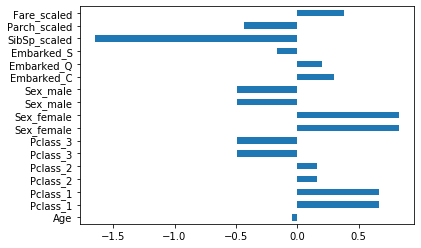

In [39]:
columns = [#'Age_categories_Missing', 'Age_categories_Infant',
       #'Age_categories_Child', 'Age_categories_Teenager',
       #'Age_categories_Young Adult', 'Age_categories_Adult',
       #'Age_categories_Senior', 
       'Age','Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']
lr= LogisticRegression()
lr.fit(train[columns], train["Survived"])
coefficients= lr.coef_
feature_importance= pd.Series(coefficients[0], index= train[columns].columns)
feature_importance.plot.barh()
plt.show()

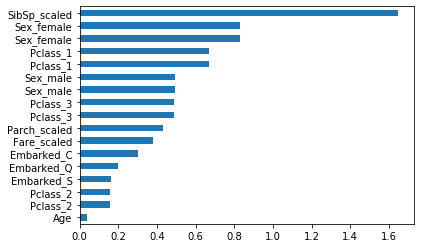

In [40]:
# I do not need to columns which have negative coefficients. 
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

In [42]:
# I will use top 8 columns to train my model

columns = [#'Age_categories_Infant','Age_categories_Senior', 
           'Age','SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Parch_scaled']

all_X= train[columns]
all_Y= train["Survived"]

lr= LogisticRegression()
scores= cross_val_score(lr, all_X, all_Y, cv=10)
accuracy= scores.mean()
print(accuracy)


C:\Users\shyl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shyl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

0.7979900124843945


C:\Users\shyl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shyl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

My accuracy looks better than the other accuracy. I will make a prediction on the "holdout" data and make a submission on the Kaggle. Let's check my score again. 

In [ ]:
columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

all_X = train[columns]

all_y = train['Survived']
lr.fit(all_X, all_y)
holdout_predictions= lr.predict(holdout[columns])
holdout_ids= holdout["PassengerId"]
submission_df= {"PassengerId":holdout_ids,
                "Survived": holdout_predictions}
submission= pd.DataFrame(submission_df)
submission.to_csv("secondsubmission.csv", index=False)

![title](secondsubmission.png)

I submitted my second prediction on Kaggle page. With the last features, I succeeded in boosting the accuracy from 76% to 77%. I need to make more implementations.

I will categorise the "Fare" column. I will create a function for it.

In [43]:
def process_fare(df):
    '''
    Process the Fare column into pre-defined 'bins'
    
    Usage
    ------
    
    train=process_fare(train)
    '''
    cut_points= [-1,12,50,100,1000]
    label_names= ["0-12", "12-50", "50-100", "100+"]
    df["Fare_categories"]= pd.cut(df["Fare"], cut_points, labels=label_names)
    return df

In [44]:
train=process_fare(train)
holdout = process_fare(holdout)

In [45]:
train = create_dummies(train,"Fare_categories")
holdout = create_dummies(holdout,"Fare_categories")

I will create another function to create the "Title" column from the "Name" column to determine the titles.

In [46]:
def process_titles(df):
    '''
    Extract and categorize the title from the name column
    
    Usage
    ------
    
    train= process_titles(train)
    '''
    titles={
        "Mr": "Mr",
        "Mme": "Mrs",
        "Ms": "Mrs",
        "Mrs": "Mrs",
        "Master": "Master",
        "Mlle": "Miss",
        "Miss": "Miss",
        "Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Dr": "Officer",
        "Rev": "Officer",
        "Jonkheer": "Royalty",
        "Don": "Royalty",
        "Sir": "Royalty",
        "Countess": "Royalty",
        "Dona": "Royalty",
        "Lady": "Royalty"
    }
    extracted_titles= df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
    df["Title"]= extracted_titles.map(titles)
    return df

I will create another function to categorize cabin types.

In [47]:
def process_cabin(df):
    '''
    Process the Cabin column into pre-defined 'bins'
    
    Usage
    ------
    
    train= process_cabin(train)
    '''
    
    df["Cabin_type"]= df["Cabin"].str[0]
    df["Cabin_type"]= df["Cabin_type"].fillna("Unknown")
    df= df.drop("Cabin", axis=1)
    return df

I will create another function to use with the functions on the data sets which I created before.

In [48]:
def pre_process(df):
    df= process_titles(df)
    df= process_cabin(df)
    
    for col in [ "Title", "Cabin_type"]:
        df= create_dummies(df,col)
    return df

train= pre_process(train)
holdout= pre_process(holdout)

I want to see the correlations of the columns.

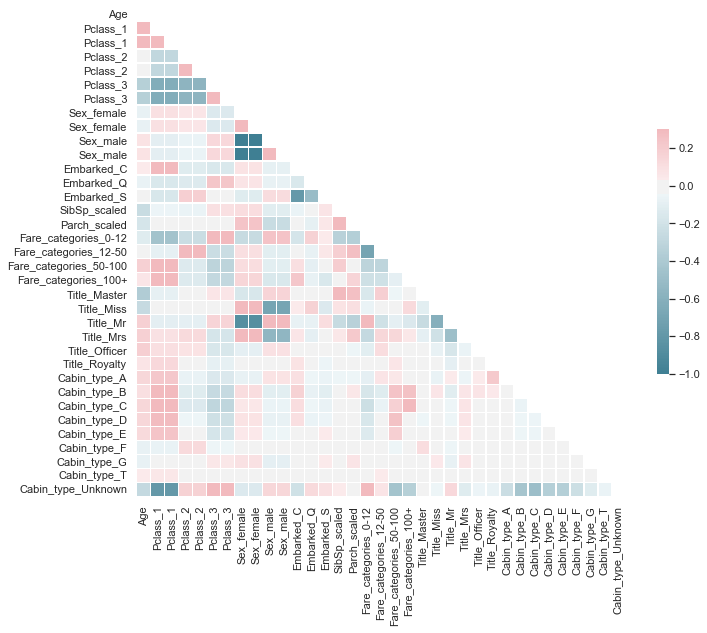

In [49]:
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = [#'Age_categories_Missing', 'Age_categories_Infant',
       #'Age_categories_Child', 'Age_categories_Teenager',
       #'Age_categories_Young Adult', 'Age_categories_Adult',
       #'Age_categories_Senior', 
       'Age','Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E','Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown']
plot_correlation_heatmap(train[columns])

There is a high correlation between "Sex_female"/"Sex_Male" and "Title_Mr"/"Title_Miss"/"Title_Mrs". I will not use the "Sex_female" and "Sex_male" columns. Also, I will eliminate the "Pclass_2", "Age_categories_Teenager", "Fare_categories_12-50", "Title_Master", "Cabin_type_A" columns to reduce collinearity. I will perform recursive feature elimination with cross validation to select most relevant features. 

In [50]:
from sklearn.feature_selection import RFECV

columns = [#'Age_categories_Missing', 'Age_categories_Infant',
       #'Age_categories_Child', 'Age_categories_Young Adult',
       #'Age_categories_Adult', 'Age_categories_Senior', 
       'Age','Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']

all_X = train[columns]
all_y = train["Survived"]
lr = LogisticRegression()
selector = RFECV(lr,cv=10)
selector.fit(all_X,all_y)

optimized_columns = all_X.columns[selector.support_]

C:\Users\shyl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shyl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\shyl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shyl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [51]:
optimized_columns

Index(['Age', 'Pclass_1', 'Pclass_1', 'Pclass_3', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'SibSp_scaled', 'Parch_scaled',
       'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown'],
      dtype='object')

The RFECV returned four columns. I will use these columns to train my model and I will make another submission on the Kaggle. After that, I will check my score again.

In [52]:
all_X = train[optimized_columns]
all_y = train["Survived"]
lr=LogisticRegression()
scores= cross_val_score(lr, all_X, all_y, cv=10)
accuracy= scores.mean()
accuracy

C:\Users\shyl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shyl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

0.821598002496879

In [ ]:
lr.fit(all_X, all_y)
holdout_predictions= lr.predict(holdout[optimized_columns])
holdout_ids= holdout["PassengerId"]
submission_df= {"PassengerId": holdout_ids,
                "Survived": holdout_predictions}
submission= pd.DataFrame(submission_df)
submission.to_csv("thirdsubmission.csv", index=False)

I got a better score on Kaggle, and this score moved me to the higher level.
<br>
![title](thirdsubmission.png)
<br>
![title](thirdscore.png)

## More Feature Selection to Improve the Prediction

I need more steps to improve my prediction. I will make more feature engineering and selection. I want to check the "SibSp" and "Parch" columns. The "Parch" column has information about parent- children relationships. The "SibSp" column has information about sibling relationships. I will create a graphic which shows the relationships between these columns and survivals.

In [53]:
explore_cols= ["SibSp", "Parch", "Survived"]
explore= train[explore_cols].copy()
explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SibSp     891 non-null    int64
 1   Parch     891 non-null    int64
 2   Survived  891 non-null    int64
dtypes: int64(3)
memory usage: 21.0 KB


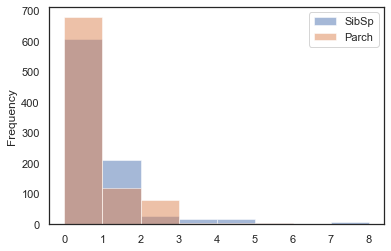

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
explore.drop("Survived", axis=1).plot.hist(alpha=0.5, bins=8)
plt.show()

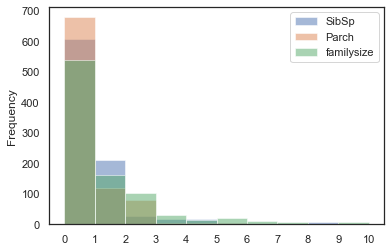

In [55]:
explore["familysize"]= explore[["SibSp", "Parch"]].sum(axis=1)
explore.drop("Survived", axis=1).plot.hist(alpha=0.5, bins=10)
plt.xticks(range(11))
plt.show()

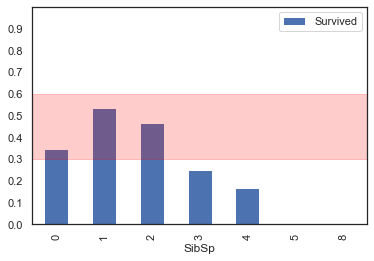

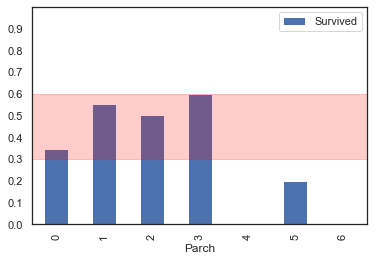

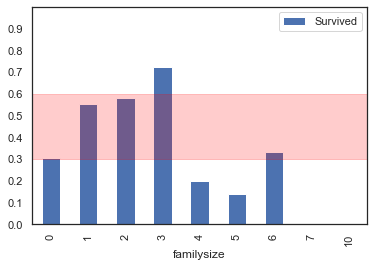

In [56]:
import numpy as np

for col in explore.columns.drop("Survived"):
    pivot= explore.pivot_table(index=col, values="Survived")
    pivot.plot.bar(ylim=(0,1), yticks=np.arange(0,1,.1))
    plt.axhspan(.3, .6, alpha=0.2, color="red")
    plt.show()

In [57]:
def process_isalone(df):
    df["familysize"]= df[["SibSp","Parch"]].sum(axis=1)
    df["isalone"]=0
    df.loc[(df["familysize"]==0), "isalone"]=1
    df=df.drop("familysize", axis=1)
    return df

train= process_isalone(train)
holdout= process_isalone(holdout)

I created a new function to add a new column to the data sets which shows family sizes.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def select_features(df):
    
    df= df.select_dtypes([np.number]).dropna(axis=1)
    all_X= df.drop(["Survived", "PassengerId"], axis=1)
    all_y= df["Survived"]
    
    clf= RandomForestClassifier(random_state=1)
    selector= RFECV(clf, cv=20)
    selector.fit(all_X, all_y)
    
    best_columns= list(all_X.columns[selector.support_])
    print("Best Columns \n"+ "_"*12+ "\n{}\n".format(best_columns))
    
    return best_columns

cols= select_features(train)

Best Columns 
____________
['Age', 'Fare', 'Sex_female', 'Sex_male', 'Sex_female', 'Fare_scaled', 'Title_Mr']



In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

def select_model(df, features):
    all_X= df[features]
    all_y= df["Survived"]
    
    models= [{
        "name": "LogisticRegression",
        "estimator": LogisticRegression(),
        "hyperparameters": { "solver": ["newton-cg", "lbfgs", "liblinear"]}
        
    },
    {
        "name": "KNeighborsClassifier",
        "estimator": KNeighborsClassifier(),
        "hyperparameters": { "n_neighbors": range(1,20,2), "weights":["distance", "uniform"], 
                           "algorithm": ["ball_tree", "kd_tree", "brute"], "p": [1,2]}
        
    },
    {
        "name": "RandomForestClassifier",
        "estimator": RandomForestClassifier(random_state=1),
        "hyperparameters": { "n_estimators": [4,6,9],
                           "criterion":["entropy", "gini"],
                            "max_depth": [2,5,10],
                            "max_features": ["log2", "sqrt"],
                            "min_samples_leaf": [1,5,8],
                            "min_samples_split": [2,3,5]
                           }
        
        
    },
    {
        "name":"StochasticGradientDescent",
        "estimator":SGDClassifier(random_state=1),
        "hyperparameters": {"loss": ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"],
                            "penalty": ["l2", "l1", "elasticnet"]}
    },
        
    ]
    
    for model in models:
        print(model["name"])
        print("-"*len(model["name"]))
        
        grid= GridSearchCV( model["estimator"],
                          param_grid= model["hyperparameters"], cv=10)
        grid.fit(all_X, all_y)
        model["best_params"]= grid.best_params_
        model["best_score"]= grid.best_score_
        model["best_model"]= grid.best_estimator_
        
        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))
    return models

In [63]:
result= select_model(train, cols)

LogisticRegression
------------------
Best Score: 0.7822596754057429
Best Parameters: {'solver': 'newton-cg'}

KNeighborsClassifier
--------------------
Best Score: 0.7744319600499376
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

RandomForestClassifier
----------------------
Best Score: 0.8249812734082396
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 6}

StochasticGradientDescent
-------------------------
Best Score: 0.7485518102372034
Best Parameters: {'loss': 'squared_hinge', 'penalty': 'l1'}



In [64]:
def save_submission_file(model, cols, filename= "lastsubmission.csv"):
    holdout_data= holdout[cols]
    predictions= model.predict(holdout_data)
    
    holdout_ids= holdout["PassengerId"]
    submission_df= {"PassengerId": holdout_ids,
                   "Survived": predictions}
    submission= pd.DataFrame(submission_df)
    submission.to_csv(filename, index=False)
    

In [65]:
best_rf_model= result[2]["best_model"]
save_submission_file(best_rf_model, cols)